In [1]:
import pandas as pd
import sklearn
import tensorflow as tf
from sklearn.metrics import precision_score, recall_score, average_precision_score
import numpy as np
from keras.callbacks import Callback

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def read_data(path, train_path, test_path):
    train_data = pd.read_csv(path + train_path)
    test_data = pd.read_csv(path + test_path)
    train_data["_id"] = train_data["_id"].apply(lambda x: x + ".jpg")
    test_data["_id"] = test_data["_id"].apply(lambda x: x + ".jpg")
    return train_data, test_data

In [3]:
path = "/kaggle/input/pizza-image-error-classification/"
train_path = "data/pizza_train.csv"
test_path = "data/pizza_test.csv"
train_data, test_data = read_data(path, train_path, test_path)

In [4]:
test_data.head()

,_id,image_url,Cháy_Baking-Burnt,Khôngđốm_Baking-Doesnothaveleopard-spotting,Màunhạt_Baking-Pale,Lênmenthiếu_Fermentation-Lackfermentation,Lênmenquánhiều_Fermentation-Overfermentation,Viềnkđều_Edge-Uneven,Viềnnhỏ_Edge-Toosmall,Viềnto_Edge-Toobig,...,Quátậptrung_Topping-Toppingtoocentered,Topping-Khôngđều_Noteven,Khônghìnhtròn_Topping-Notcircled,Thiếubóng_toofewballs,Nởviềnkhôngđủ_edgepizzaisnotenoughswollen,Bánhkhôngtròn_Distortedshape,Bánhbé_Size-Toosmall,Bánhlớn_Size-Toobig,Phômaicao_Topping-Cheesetoohigh,image_error
0,644a51aae280ef002847f69e.jpg,https://oven-bucket.pizza4ps.io/images/2023042...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,644a5224e280ef002847f6a1.jpg,https://oven-bucket.pizza4ps.io/images/2023042...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,644a52d0e280ef002847f6ab.jpg,https://oven-bucket.pizza4ps.io/images/2023042...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,644a5370e280ef002847f6b0.jpg,https://oven-bucket.pizza4ps.io/images/2023042...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,644a5381e280ef002847f6b2.jpg,https://oven-bucket.pizza4ps.io/images/2023042...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
train_data.shape

(65221, 26)

In [6]:
test_data.shape

(16305, 26)

In [7]:
train_data.head()

,_id,image_url,Cháy_Baking-Burnt,Khôngđốm_Baking-Doesnothaveleopard-spotting,Màunhạt_Baking-Pale,Lênmenthiếu_Fermentation-Lackfermentation,Lênmenquánhiều_Fermentation-Overfermentation,Viềnkđều_Edge-Uneven,Viềnnhỏ_Edge-Toosmall,Viềnto_Edge-Toobig,...,Quátậptrung_Topping-Toppingtoocentered,Topping-Khôngđều_Noteven,Khônghìnhtròn_Topping-Notcircled,Thiếubóng_toofewballs,Nởviềnkhôngđủ_edgepizzaisnotenoughswollen,Bánhkhôngtròn_Distortedshape,Bánhbé_Size-Toosmall,Bánhlớn_Size-Toobig,Phômaicao_Topping-Cheesetoohigh,image_error
0,647db9d9ba8c270029f76b6f.jpg,https://oven-bucket.pizza4ps.io/images/2023060...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,64636724ba8c270029f70623.jpg,https://oven-bucket.pizza4ps.io/images/2023051...,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,64a0028ca2f5430028b12eb0.jpg,https://oven-bucket.pizza4ps.io/images/2023070...,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,64830e48ba8c270029f77a3e.jpg,https://oven-bucket.pizza4ps.io/images/2023060...,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,644b9d31ba8c270029f697a7.jpg,https://oven-bucket.pizza4ps.io/images/2023042...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
labels = [
    "Cháy_Baking-Burnt",
    "Khôngđốm_Baking-Doesnothaveleopard-spotting",
    "Màunhạt_Baking-Pale",
    "Lênmenthiếu_Fermentation-Lackfermentation",
    "Viềnkđều_Edge-Uneven",
    "Viềnnhỏ_Edge-Toosmall",
    "Viềnto_Edge-Toobig",
    "Viềnthấp_Edge-Toolow",
    "Quátheoviền_Topping-Toostrongshapingtheedge",
    "Topping-Khôngđúng_incorrectportioning",
    "KhôngcânTopping-Notevenhalfandhalf",
    "Sốttrênmép_Topping-Saucecoveringontheedge",
    "Trộnlẫn_Topping-Bended",
    "Quátậptrung_Topping-Toppingtoocentered",
    "Topping-Khôngđều_Noteven",
    "Thiếubóng_toofewballs",
    "Nởviềnkhôngđủ_edgepizzaisnotenoughswollen",
    "Bánhkhôngtròn_Distortedshape",
    "Bánhbé_Size-Toosmall",
    "Phômaicao_Topping-Cheesetoohigh",
]
num_labels = len(labels)
print(num_labels)

20


In [9]:
from keras.preprocessing.image import ImageDataGenerator

image_data_generator = ImageDataGenerator(
    #     rotation_range=30,  # Góc xoay ảnh
    rescale=1.0 / 255,  # Tiền xử lý: chia màu cho 255 để đưa về khoảng [0, 1]
    # shear_range=0.2,  # Góc cắt ảnh
    # horizontal_flip=True,  # Lật ảnh theo chiều ngang
    # width_shift_range=0.2,  # Dịch ảnh theo chiều ngang
    # height_shift_range=0.2,  # Dịch ảnh theo chiều dọc
    validation_split=0.2,  # Tỉ lệ dữ liệu dùng để validation
)
test_data_generator = ImageDataGenerator(rescale=1.0 / 255)

In [10]:
image_path = path + "image_input/image_input"

In [11]:
train_generator = image_data_generator.flow_from_dataframe(
    dataframe=train_data,
    directory=image_path,
    x_col="_id",
    y_col=labels,
    subset="training",
    batch_size=32,
    shuffle=True,
    class_mode="raw",
    target_size=(224, 224),
    seed=42,
)
val_generator = image_data_generator.flow_from_dataframe(
    dataframe=train_data,
    directory=image_path,
    x_col="_id",
    y_col=labels,
    subset="validation",
    batch_size=32,
    shuffle=True,
    class_mode="raw",
    target_size=(224, 224),
    seed=42,
)
test_generator = test_data_generator.flow_from_dataframe(
    dataframe=test_data,
    directory=image_path,
    x_col="_id",
    y_col=labels,
    batch_size=32,
    shuffle=True,
    class_mode="raw",
    target_size=(224, 224),
)

Found 52177 validated image filenames.
Found 13044 validated image filenames.
Found 16305 validated image filenames.


In [12]:
train_generator.n

52177

In [13]:
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras import backend as K


def inception_v3_create_model():
    base_model = InceptionV3(
        weights="imagenet", include_top=False, input_shape=(224, 224, 3)
    )

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation="relu")(x)
    x = Dropout(0.2)(x)
    predictions = Dense(num_labels, activation="sigmoid")(x)

    base_model.trainable = True
    model = Model(inputs=base_model.input, outputs=predictions)

    model.compile(
        optimizer="adam", loss="binary_crossentropy", metrics=["binary_accuracy"]
    )
    return model


# inception_v3_model = create_model()

In [14]:
class Metrics(Callback):
    def __init__(self, val_generator, num_classes):
        super().__init__()
        self.val_generator = val_generator
        self.num_classes = num_classes

    def on_epoch_end(self, epoch, logs=None):
        # Duyệt qua từng batch và tính toán
        true_labels = []
        predicted_labels = []

        for i in range(len(self.val_generator)):
            images, labels = self.val_generator[i]
            true_labels.extend(labels)

            # Thực hiện dự đoán
            predictions = self.model.predict(images, verbose=0)

            # Chuyển đổi dự đoán thành nhãn binary (0 hoặc 1)
            binary_predictions = (predictions > 0.5).astype(int)
            predicted_labels.extend(binary_predictions)

        # Chuyển đổi danh sách thành numpy arrays
        true_labels = np.array(true_labels)
        predicted_labels = np.array(predicted_labels)

        # Tính precision và recall cho từng nhãn
        per_class_precision = precision_score(
            true_labels, predicted_labels, average=None, zero_division=1
        )
        per_class_recall = recall_score(
            true_labels, predicted_labels, average=None, zero_division=1
        )

        # Tính AP (Average Precision) cho từng nhãn
        ap_scores = average_precision_score(true_labels, predicted_labels, average=None)

        # Tính mAP (mean Average Precision)
        map_score = np.mean(ap_scores)

        per_class_precision = [
            "{:.2f}".format(precision) for precision in per_class_precision
        ]
        per_class_recall = ["{:.2f}".format(recall) for recall in per_class_recall]
        ap_scores = ["{:.2f}".format(ap) for ap in ap_scores]
        map_score = "{:.2f}".format(map_score)

        # Hiển thị kết quả
        print(f"Epoch: {epoch + 1}")
        print("Precision:", end="  ")
        for i in range(len(per_class_precision)):
            print(per_class_precision[i], end="  ")
        print("\nRecall:   ", end="  ")
        for i in range(len(per_class_recall)):
            print(per_class_recall[i], end="  ")
        print("\nAP:       ", end="  ")
        for i in range(len(ap_scores)):
            print(ap_scores[i], end="  ")
        print()
        print(f"mAP: {map_score}")
        print()

In [15]:
import os
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint


def call_back(checkpoint_path):
    early_stopping_callback = EarlyStopping(
        patience=10,  # Số epochs không có cải thiện trước khi dừng huấn luyện
        monitor="val_loss",  # Monitor validation loss
        restore_best_weights=True,  # Khôi phục trọng số của model tại epoch có validation loss tốt nhất
        verbose=1,
    )
    checkpoint_dir = os.path.dirname(checkpoint_path)

    checkpoint_callback = ModelCheckpoint(
        filepath=checkpoint_path,
        save_weights_only=True,  # Lưu toàn bộ mô hình, không chỉ là trọng số
        monitor="val_loss",  # Theo dõi giá trị validation loss
        save_best_only=True,  # Lưu chỉ model có đạt được giá trị tốt nhất trên 'monitor'
        mode="min",  # Theo dõi theo chiều giảm của 'monitor'
        verbose=1,  # Hiển thị thông báo khi lưu model
    )

    metrics_callback = Metrics(val_generator=val_generator, num_classes=num_labels)
    return early_stopping_callback, checkpoint_callback, metrics_callback

In [16]:
checkpoint_path = "/kaggle/working/model_saver/inceptionv3.ckpt"

In [17]:
early_stopping_callback, checkpoint_callback, metrics_callback = call_back(
    checkpoint_path
)

In [18]:
inception_v3_model = inception_v3_create_model()

87910968/87910968 [==============================] - 0s 0us/step


In [19]:
hist = inception_v3_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[checkpoint_callback, early_stopping_callback, metrics_callback],
)

Epoch 1/50
1631/1631 [==============================] - ETA: 0s - loss: 0.2827 - binary_accuracy: 0.8792
Epoch 1: val_loss improved from inf to 0.29229, saving model to /kaggle/working/model_saver/inceptionv3.ckpt
Epoch: 1
Precision:  0.89  0.72  0.51  0.42  0.79  0.59  0.77  0.29  0.00  0.87  0.85  0.78  1.00  0.73  1.00  0.74  0.42  0.84  0.69  0.39  
Recall:     0.28  0.75  0.93  0.02  0.24  0.62  0.40  0.45  0.00  0.07  0.11  0.05  0.00  0.15  0.00  0.72  0.78  0.86  0.33  0.86  
AP:         0.44  0.60  0.49  0.03  0.37  0.47  0.45  0.16  0.02  0.11  0.21  0.14  0.02  0.12  0.02  0.62  0.36  0.82  0.36  0.35  
mAP: 0.31

1631/1631 [==============================] - 1516s 900ms/step - loss: 0.2827 - binary_accuracy: 0.8792 - val_loss: 0.2923 - val_binary_accuracy: 0.8729
Epoch 2/50
1631/1631 [==============================] - ETA: 0s - loss: 0.2429 - binary_accuracy: 0.8959
Epoch 2: val_loss improved from 0.29229 to 0.25039, saving model to /kaggle/working/model_saver/inceptionv3.ck

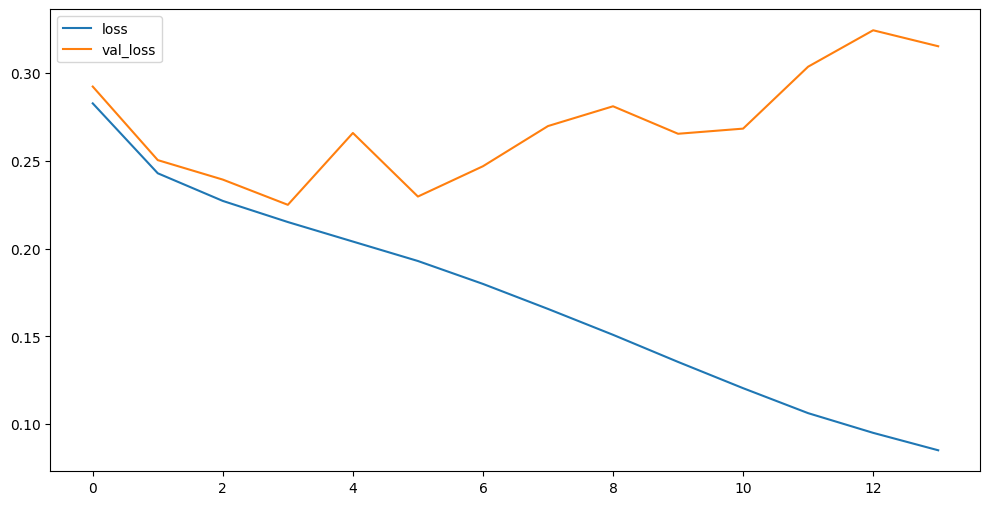

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(hist.history["loss"], label="loss")
plt.plot(hist.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

In [21]:
print(checkpoint_path)

/kaggle/working/model_saver/inceptionv3.ckpt


In [22]:
best_model = inception_v3_create_model()

best_model.load_weights(checkpoint_path)

loss, acc = best_model.evaluate(test_generator, steps=len(test_generator), verbose=2)

print(f"Loss: {loss}\nBianry_accuracy: {acc}")

510/510 - 331s - loss: 0.2256 - binary_accuracy: 0.9028 - 331s/epoch - 649ms/step
Loss: 0.22562755644321442
Bianry_accuracy: 0.9028126001358032


In [23]:
best_model.save("/kaggle/working/model_saver/best_model.keras")

# Predict


In [24]:
# Khởi tạo empty arrays để lưu kết quả
true_labels = []
predicted_labels = []

# Duyệt qua từng batch và tính toán
for i in range(len(test_generator)):
    images, labelss = test_generator[i]
    true_labels.extend(labelss)

    # Thực hiện dự đoán
    predictions = best_model.predict(images, verbose=0)

    # Chuyển đổi dự đoán thành nhãn binary (0 hoặc 1)
    binary_predictions = (predictions > 0.5).astype(int)
    predicted_labels.extend(binary_predictions)

# Chuyển đổi danh sách thành numpy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Tính precision và recall cho từng nhãn
per_class_precision = precision_score(true_labels, predicted_labels, average=None)
per_class_recall = recall_score(true_labels, predicted_labels, average=None)

# Tính AP (Average Precision) cho từng nhãn
ap_scores = average_precision_score(true_labels, predicted_labels, average=None)

# Tính mAP (mean Average Precision)
map_score = np.mean(ap_scores)

In [25]:
# Hiển thị kết quả
for label, precision, recall, ap in zip(
    labels, per_class_precision, per_class_recall, ap_scores
):
    print(f"Label: {label}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"AP: {ap}")
    print("-" * 30)

print(f"mAP: {map_score}")

Label: Cháy_Baking-Burnt
Precision: 0.7069041336851363
Recall: 0.7487191429902189
AP: 0.59544867677486
------------------------------
Label: Khôngđốm_Baking-Doesnothaveleopard-spotting
Precision: 0.800978792822186
Recall: 0.7377911344853494
AP: 0.6551684837177277
------------------------------
Label: Màunhạt_Baking-Pale
Precision: 0.7871113856289891
Recall: 0.7390295766479799
AP: 0.6644952822286714
------------------------------
Label: Lênmenthiếu_Fermentation-Lackfermentation
Precision: 0.6521739130434783
Recall: 0.05102040816326531
AP: 0.05038549478429026
------------------------------
Label: Viềnkđều_Edge-Uneven
Precision: 0.6846473029045643
Recall: 0.588985211626721
AP: 0.5021125153090933
------------------------------
Label: Viềnnhỏ_Edge-Toosmall
Precision: 0.7504424778761062
Recall: 0.46593406593406594
AP: 0.4986907536049039
------------------------------
Label: Viềnto_Edge-Toobig
Precision: 0.707208460896187
Recall: 0.6836158192090396
AP: 0.5555840063425111
---------------------

In [26]:
test_data

,_id,image_url,Cháy_Baking-Burnt,Khôngđốm_Baking-Doesnothaveleopard-spotting,Màunhạt_Baking-Pale,Lênmenthiếu_Fermentation-Lackfermentation,Lênmenquánhiều_Fermentation-Overfermentation,Viềnkđều_Edge-Uneven,Viềnnhỏ_Edge-Toosmall,Viềnto_Edge-Toobig,...,Quátậptrung_Topping-Toppingtoocentered,Topping-Khôngđều_Noteven,Khônghìnhtròn_Topping-Notcircled,Thiếubóng_toofewballs,Nởviềnkhôngđủ_edgepizzaisnotenoughswollen,Bánhkhôngtròn_Distortedshape,Bánhbé_Size-Toosmall,Bánhlớn_Size-Toobig,Phômaicao_Topping-Cheesetoohigh,image_error
0,644a51aae280ef002847f69e.jpg,https://oven-bucket.pizza4ps.io/images/2023042...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,644a5224e280ef002847f6a1.jpg,https://oven-bucket.pizza4ps.io/images/2023042...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,644a52d0e280ef002847f6ab.jpg,https://oven-bucket.pizza4ps.io/images/2023042...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,644a5370e280ef002847f6b0.jpg,https://oven-bucket.pizza4ps.io/images/2023042...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,644a5381e280ef002847f6b2.jpg,https://oven-bucket.pizza4ps.io/images/2023042...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16300,64acfabca2f5430028b154f0.jpg,https://oven-bucket.pizza4ps.io/images/2023071...,1,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
16301,64acfb40a2f5430028b154f1.jpg,https://oven-bucket.pizza4ps.io/images/2023071...,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
16302,64acfc97a2f5430028b154f4.jpg,https://oven-bucket.pizza4ps.io/images/2023071...,1,1,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
16303,64ad00b3a2f5430028b154f9.jpg,https://oven-bucket.pizza4ps.io/images/2023071...,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,1,0,0,0


In [27]:
image_path_test = (
    "/kaggle/input/pizza-image-error-classification/image_input/image_input/"
)
_id_name = "64ad0192a2f5430028b154fc.jpg"

In [28]:
path = image_path_test + _id_name

In [29]:
test_id = test_data[test_data["_id"] == _id_name]

In [30]:
test_id

,_id,image_url,Cháy_Baking-Burnt,Khôngđốm_Baking-Doesnothaveleopard-spotting,Màunhạt_Baking-Pale,Lênmenthiếu_Fermentation-Lackfermentation,Lênmenquánhiều_Fermentation-Overfermentation,Viềnkđều_Edge-Uneven,Viềnnhỏ_Edge-Toosmall,Viềnto_Edge-Toobig,...,Quátậptrung_Topping-Toppingtoocentered,Topping-Khôngđều_Noteven,Khônghìnhtròn_Topping-Notcircled,Thiếubóng_toofewballs,Nởviềnkhôngđủ_edgepizzaisnotenoughswollen,Bánhkhôngtròn_Distortedshape,Bánhbé_Size-Toosmall,Bánhlớn_Size-Toobig,Phômaicao_Topping-Cheesetoohigh,image_error
16304,64ad0192a2f5430028b154fc.jpg,https://oven-bucket.pizza4ps.io/images/2023071...,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [31]:
real_labels = test_id[labels]

In [32]:
real_labels = np.array(real_labels)

In [33]:
print(real_labels)

[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0]]


In [34]:
real_labels_name = []
for i in range(len(real_labels)):
    real_labels_name.append([])
    for j in range(len(real_labels[i])):
        if real_labels[i][j] == 1:
            real_labels_name[i].append(labels[j])

print(real_labels_name)

[['Khôngđốm_Baking-Doesnothaveleopard-spotting', 'Thiếubóng_toofewballs', 'Bánhkhôngtròn_Distortedshape']]


In [35]:
# def tranfer_image(image_path):
image = tf.keras.preprocessing.image.load_img(path, target_size=(224, 224))
image = tf.keras.preprocessing.image.img_to_array(image)
image = image.reshape((1,) + image.shape)
image /= 255.0
# return image

result = best_model.predict(image)

1/1 [==============================] - 1s 1s/step


In [36]:
print(result)

[[4.3130219e-02 9.8357427e-01 4.2409968e-02 1.0466016e-01 1.3759463e-01
  4.5806568e-02 2.0715746e-01 1.9752420e-02 9.2221198e-05 4.1465331e-03
  9.2903879e-03 2.6517239e-04 4.0704431e-03 4.6561233e-04 5.0939264e-04
  9.9430001e-01 2.6650918e-03 9.7891611e-01 6.9751698e-01 2.5725062e-04]]


In [37]:
def decode_predictions(predict):
    result = []
    confidence = []
    for i in range(len(predict)):
        result.append([])
        for j in range(len(predict[i])):
            if predict[i][j] > 0.5:
                result[i].append(labels[j])
                confidence.append(round(predict[i][j], 4))
    predict_label, confidence = result[0], confidence
    return predict_label, confidence

In [38]:
predict_label, confidence = decode_predictions(result)

In [39]:
print(predict_label)

['Khôngđốm_Baking-Doesnothaveleopard-spotting', 'Thiếubóng_toofewballs', 'Bánhkhôngtròn_Distortedshape', 'Bánhbé_Size-Toosmall']


In [40]:
confidence

[0.9836, 0.9943, 0.9789, 0.6975]

In [41]:
predict_label, confidence = decode_predictions(result)
for i in range(len(predict_label)):
    print(
        f"Label: {predict_label[i]}                      Confidence: {round(confidence[i]*100)}%"
    )

Label: Khôngđốm_Baking-Doesnothaveleopard-spotting                      Confidence: 98%
Label: Thiếubóng_toofewballs                      Confidence: 99%
Label: Bánhkhôngtròn_Distortedshape                      Confidence: 98%
Label: Bánhbé_Size-Toosmall                      Confidence: 70%


In [42]:
print(real_labels_name)

[['Khôngđốm_Baking-Doesnothaveleopard-spotting', 'Thiếubóng_toofewballs', 'Bánhkhôngtròn_Distortedshape']]


In [43]:
def display_predict(_id):
    path = image_path_test + _id_name
    test_id = test_data[test_data["_id"] == _id_name]
    real_labels = test_id[labels]
    real_labels = np.array(real_labels)

    real_labels_name = []
    for i in range(len(real_labels)):
        real_labels_name.append([])
        for j in range(len(real_labels[i])):
            if real_labels[i][j] == 1:
                real_labels_name[i].append(labels[j])

    print(real_labels_name)

In [44]:
best_model.save("/kaggle/working/model_saver/best_model.keras")